In [30]:
1+1

2

In [31]:
import requests
import pandas as pd
from pathlib import Path

print("Bibliotecas carregadas com sucesso!")

Bibliotecas carregadas com sucesso!


In [32]:
import requests
import pandas as pd

def buscar_dolar_periodo(data_inicial: str, data_final: str) -> pd.DataFrame:
    """
    Busca cotações de dólar (PTAX) no Banco Central entre duas datas.
    Formato das datas: 'MM-DD-YYY'
    Retorna um pandas.DataFrame com as colunas da API.
    """
    base_url = (
        "https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/"
        "odata/CotacaoDolarPeriodo(dataInicial=@dataInicial,dataFinalCotacao=@dataFinalCotacao)"
    )

    params = {
        "@dataInicial": f"'{data_inicial}'",
        "@dataFinalCotacao": f"'{data_final}'",
        "$format": "json"
    }

    response = requests.get(base_url, params=params, timeout=10)

    response.raise_for_status()

    data = response.json()["value"]

    df = pd.DataFrame(data)

    df["dataHoraCotacao"] = pd.to_datetime(
        df["dataHoraCotacao"],
        format="%Y-%m-%d %H:%M:%S.%f"
    )

    return df

In [33]:
from pathlib import Path

NOTEBOOKS_DIR = Path.cwd()

BASE_DIR = NOTEBOOKS_DIR.parent

DATA_DIR = BASE_DIR / "data"
BRONZE_DIR = DATA_DIR / "bronze"
SILVER_DIR = DATA_DIR / "silver"
GOLD_DIR = DATA_DIR / "gold"

for d in [DATA_DIR, BRONZE_DIR, SILVER_DIR, GOLD_DIR]:
    d.mkdir(parents=True, exist_ok=True)

BASE_DIR, DATA_DIR, BRONZE_DIR


(WindowsPath('C:/Users/maria/OneDrive/Documents/projetos_dados/projeto-bcb-dolar'),
 WindowsPath('C:/Users/maria/OneDrive/Documents/projetos_dados/projeto-bcb-dolar/data'),
 WindowsPath('C:/Users/maria/OneDrive/Documents/projetos_dados/projeto-bcb-dolar/data/bronze'))

In [34]:
import sys

sys.path.append(str(BASE_DIR))

from src.transformations import to_silver, to_gold

print("Import de to_silver e to_gold ok!")

Import de to_silver e to_gold ok!


In [35]:
df_bronze = buscar_dolar_periodo("01-01-2024", "01-31-2024")

df_bronze.head()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao
0,4.8910,4.8916,2024-01-02 13:05:50.319
1,4.9206,4.9212,2024-01-03 13:14:41.153
2,4.9182,4.9188,2024-01-04 13:05:35.048
3,4.8893,4.8899,2024-01-05 13:10:31.843
4,4.8844,4.8850,2024-01-08 13:11:30.760


In [36]:
nome_arquivo = "dolar_ptax_2024-01-01_2024-01-31_raw.csv"
caminho_arquivo = BRONZE_DIR / nome_arquivo

df_bronze.to_csv(caminho_arquivo, index=False)

caminho_arquivo

WindowsPath('C:/Users/maria/OneDrive/Documents/projetos_dados/projeto-bcb-dolar/data/bronze/dolar_ptax_2024-01-01_2024-01-31_raw.csv')

In [37]:
df_silver = to_silver(df_bronze)
df_silver.head()

,cotacaoCompra,cotacaoVenda,dataHoraCotacao,data
0,4.8910,4.8916,2024-01-02 13:05:50.319,2024-01-02
1,4.9206,4.9212,2024-01-03 13:14:41.153,2024-01-03
2,4.9182,4.9188,2024-01-04 13:05:35.048,2024-01-04
3,4.8893,4.8899,2024-01-05 13:10:31.843,2024-01-05
4,4.8844,4.8850,2024-01-08 13:11:30.760,2024-01-08


In [38]:

nome_arquivo_silver = "dolar_ptax_2024-01-01_2024-01-31_silver.csv"
caminho_arquivo_silver = SILVER_DIR / nome_arquivo_silver

df_silver.to_csv(caminho_arquivo_silver, index=False)

caminho_arquivo_silver

WindowsPath('C:/Users/maria/OneDrive/Documents/projetos_dados/projeto-bcb-dolar/data/silver/dolar_ptax_2024-01-01_2024-01-31_silver.csv')

In [39]:
df_gold = to_gold(df_silver)
df_gold.head()

,data,cotacao_compra_media,cotacao_venda_media,cotacao_compra_min,cotacao_venda_max,qtde_cotacoes
0,2024-01-02,4.8910,4.8916,4.8910,4.8916,1
1,2024-01-03,4.9206,4.9212,4.9206,4.9212,1
2,2024-01-04,4.9182,4.9188,4.9182,4.9188,1
3,2024-01-05,4.8893,4.8899,4.8893,4.8899,1
4,2024-01-08,4.8844,4.8850,4.8844,4.8850,1


In [40]:

nome_arquivo_gold = "dolar_ptax_2024-01-01_2024-01-31_gold.csv"
caminho_arquivo_gold = GOLD_DIR / nome_arquivo_gold

df_gold.to_csv(caminho_arquivo_gold, index=False)

caminho_arquivo_gold

WindowsPath('C:/Users/maria/OneDrive/Documents/projetos_dados/projeto-bcb-dolar/data/gold/dolar_ptax_2024-01-01_2024-01-31_gold.csv')

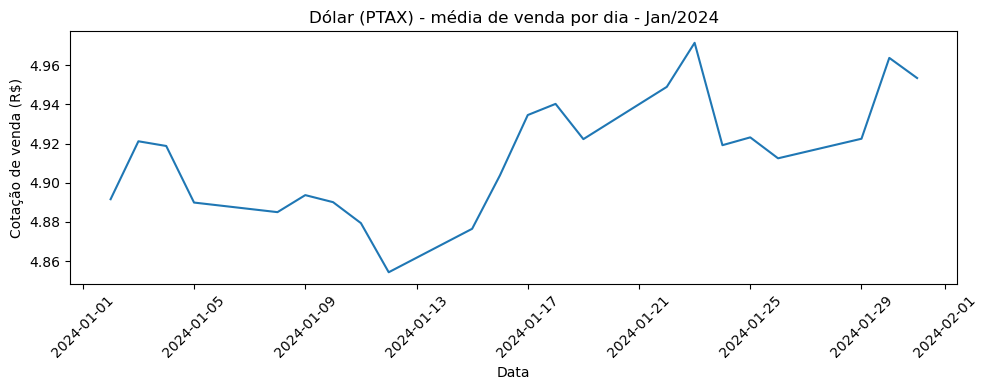

In [25]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df_gold["data"], df_gold["cotacao_venda_media"])

plt.title("Dólar (PTAX) - média de venda por dia - Jan/2024")
plt.xlabel("Data")
plt.ylabel("Cotação de venda (R$)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()